In [1]:
import os
from datetime import datetime  
import tellurium as te
import numpy as np
import pygmo as pg
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
# load SBML model
modelfile = os.getcwd()+'/models/240621_VN_Metabolism_Gly_BIOSYN.sbml'
r = te.loadSBMLModel(modelfile)

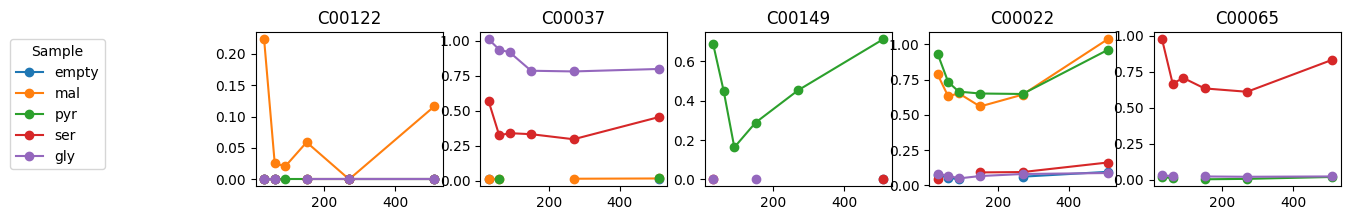

In [3]:
# get data and metadata for experiment
with open('data/230623_Kinetics_DA/simulation_ready.pkl', 'rb') as f:
    simulation_ready = pickle.load(f)
    init_concentrations_230623 = {k:v/1000 for k,v in simulation_ready['init_concentrations'].items()}   
    metadata_230623 = simulation_ready['metadata']
    measurements_230623 = simulation_ready['measurements']


labels = {'Mdh':'EC11137','Pyc':'EC6411', 'Fdh':'EC11719','EC117984':'EC11719','':'C00058','C00158_hct':'C00158HCT'}
init_concentrations_230623 = {k0:{k: 0 if ('EC' in k and np.isnan(v)) else v for k,v in v0.items()} for k0, v0 in init_concentrations_230623.items()}

# preprocessing

metadata_230623['measurement_labels'] = metadata_230623['measurement_labels'][1:]
measurements_230623 = {k:v[:,1:] for k,v in measurements_230623.items()}

measurements_230623['mal'][:,2] = np.full(len(metadata_230623['timepoints']['mal']),np.nan)
measurements_230623['pyr'][:,3] = measurements_230623['pyr'][:,3]/4

# thinking zeros may be driving the error up  
for k,v in measurements_230623.items():
    v[v < 10E-4] = 10E-5
    measurements_230623[k] = v


fudge_factors_230623 = {k:v for k,v in zip(metadata_230623['measurement_labels'],[1,0.1,2.2,1,1])} # to mM in figure
plt.figure(figsize=(14,2))
for s in metadata_230623['sample_labels']:
    metadata_230623['timepoints'][s] = metadata_230623['timepoints'][s] + 30*60
    for i,m in enumerate(metadata_230623['measurement_labels']):
        measurements_230623[s][:,i] = measurements_230623[s][:,i]*fudge_factors_230623[m]
        plt.subplot(1,len(metadata_230623['measurement_labels']),i+1)
        plt.plot(metadata_230623['timepoints'][s]/60, measurements_230623[s][:,i],'-o')
        plt.title(m)
plt.legend(metadata_230623['sample_labels'],bbox_to_anchor=(-6.15, 1), loc='upper left', title='Sample')

# define variables that don't change during fitting, but could be different across samples
# (dilution factor, biosynthesis metabolites, which enzymes are present)
variables_230623 = {}
for s in metadata_230623['sample_labels']:
    variables_230623[s] = {'dilution_factor':1/metadata_230623['dilution_factor'][s]}
    variables_230623[s] = {**variables_230623[s] , **{p:1 for p in r.getGlobalParameterIds() if 'p_EC' in p}}
    variables_230623[s] = {**variables_230623[s] , **init_concentrations_230623[s]}

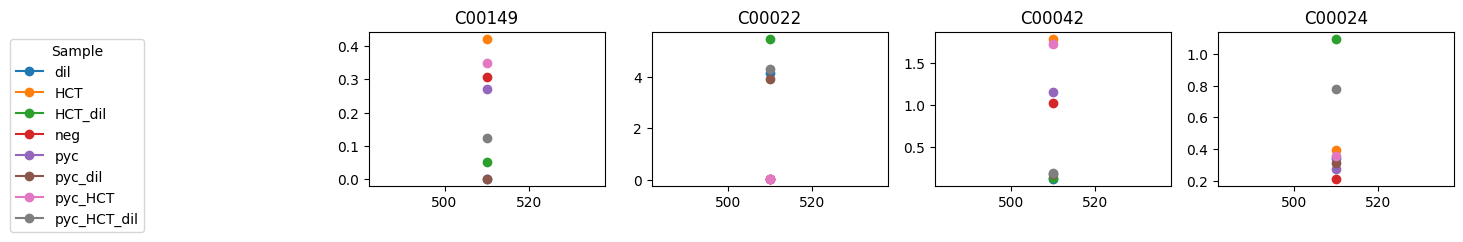

In [4]:
# get data and metadata for experiment
with open('data/231212_pyc_HANDMIX/simulation_ready.pkl', 'rb') as f:
    simulation_ready = pickle.load(f)
    init_concentrations_231212 = simulation_ready['init_concentrations']   
    metadata_231212 = simulation_ready['metadata']
    measurements_231212 = simulation_ready['measurements']

init_concentrations_231212 = {k0:{k.replace('_hct', 'HCT'):v for k,v in v0.items()} for k0, v0 in init_concentrations_231212.items()}
enzyme_labels = {'Mdh':'EC11137','Pyc':'EC6411', 'Fdh':'EC11719','EC117984':'EC11719'}
init_concentrations_231212 = {k0:{enzyme_labels[k] if k in enzyme_labels.keys() else k:v for k,v in v0.items()} for k0, v0 in init_concentrations_231212.items()}
init_concentrations_231212 = {k0:{k: 0 if ('EC' in k and np.isnan(v)) else v for k,v in v0.items()} for k0, v0 in init_concentrations_231212.items()}

for k,v in init_concentrations_231212.items():
    if 'pyc' in k:
        init_concentrations_231212[k]['EC11137'] = 1
        init_concentrations_231212[k]['EC11719'] = 1
        init_concentrations_231212[k]['EC6411'] = 5

measurements_231212['HCT_dil'][0] = measurements_231212['pyc_HCT_dil'][0]/2.508
fudge_factors_231212 = {k:v for k,v in zip(metadata_231212['sample_labels'],[1,2.517770176,6.201586397,2.755515115,2.889987546,1,2.647939175,6.20344567])} # to mM in figure
for s in metadata_231212['sample_labels']:
    measurements_231212[s][0] = measurements_231212[s][0]*fudge_factors_231212[s]

# thinking zeros may be driving the error up  
for k,v in measurements_231212.items():
    v[v < 10E-4] = 10E-5
    measurements_231212[k] = v
    measurements_231212[k] = np.expand_dims(measurements_231212[k],0)

plt.figure(figsize=(14,2))
for s in metadata_231212['sample_labels']:
    metadata_231212['timepoints'][s] = metadata_231212['timepoints'][s] + 30*60.0
    for i,m in enumerate(metadata_231212['measurement_labels']):
        plt.subplot(1,len(metadata_231212['measurement_labels']),i+1)
        plt.plot(metadata_231212['timepoints'][s]/60, measurements_231212[s][:,i],'-o')
        plt.title(m)
plt.legend(metadata_231212['sample_labels'],bbox_to_anchor=(-5.15, 1), loc='upper left', title='Sample')

# define variables that don't change during fitting, but could be different across samples
# (dilution factor, biosynthesis metabolites, which enzymes are present)
variables_231212 = {}
for s in metadata_231212['sample_labels']:
    variables_231212[s] = {'dilution_factor':1/metadata_231212['dilution_factor'][s]}
    variables_231212[s] = {**variables_231212[s] , **{p:1 for p in r.getGlobalParameterIds() if 'p_EC' in p}}
    variables_231212[s] = {**variables_231212[s] , **init_concentrations_231212[s]}

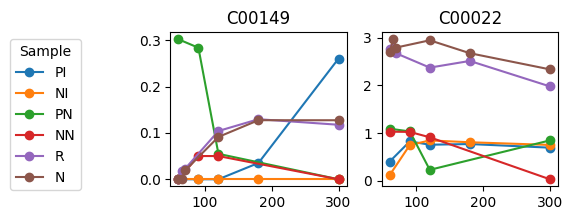

In [5]:
# get data and metadata for experiment
with open('data/220907_Pyc/simulation_ready.pkl', 'rb') as f:
    simulation_ready = pickle.load(f)
    init_concentrations_220907 = {k:v/1000 for k,v in simulation_ready['init_concentrations'].items()}   
    metadata_220907 = simulation_ready['metadata']
    measurements_220907 = simulation_ready['measurements']

labels = {'Mdh':'EC11137','Pyc':'EC6411', 'Fdh':'EC11719','EC117984':'EC11719','':'C00058','C00158_hct':'C00158HCT'}
init_concentrations_220907 = {k0:{labels[k] if k in labels.keys() else k:v for k,v in v0.items()} for k0, v0 in init_concentrations_220907.items()}
init_concentrations_220907 = {k0:{k: 0 if ('EC' in k and np.isnan(v)) else v for k,v in v0.items()} for k0, v0 in init_concentrations_220907.items()}

for k,v in init_concentrations_220907.items():
    if k in ['PI','PN']:
        init_concentrations_220907[k]['EC11137'] = 1
        init_concentrations_220907[k]['EC11719'] = 2
        init_concentrations_220907[k]['EC6411'] = 7
    if k in ['NI','NN']:
        init_concentrations_220907[k]['EC11137'] = 1
        init_concentrations_220907[k]['EC11719'] = 2
        init_concentrations_220907[k]['EC6411'] = 0
    if k in ['R']:
        init_concentrations_220907[k]['EC11137'] = 0.1
        init_concentrations_220907[k]['EC11719'] = 2
        init_concentrations_220907[k]['EC6411'] = 10
    if k in ['N']:
        init_concentrations_220907[k]['EC11137'] = 0
        init_concentrations_220907[k]['EC11719'] = 0
        init_concentrations_220907[k]['EC6411'] = 0

for s in metadata_220907['sample_labels']:
    measurements_220907[s] = measurements_220907[s]/1000

# thinking zeros may be driving the error up  
for k,v in measurements_220907.items():
    v[v < 10E-4] = 10E-5
    measurements_220907[k] = v

plt.figure(figsize=(5,2))
for s in metadata_220907['sample_labels']:
    metadata_220907['timepoints'][s] = metadata_220907['timepoints'][s] + 30*60
    for i,m in enumerate(metadata_220907['measurement_labels']):
        plt.subplot(1,len(metadata_220907['measurement_labels']),i+1)
        plt.plot(metadata_220907['timepoints'][s]/60, measurements_220907[s][:,i],'-o')
        plt.title(m)
plt.legend(metadata_220907['sample_labels'],bbox_to_anchor=(-2.15, 1), loc='upper left', title='Sample')

# define variables that don't change during fitting, but could be different across samples
# (dilution factor, biosynthesis metabolites, which enzymes are present)
variables_220907 = {}
for s in metadata_220907['sample_labels']:
    variables_220907[s] = {'dilution_factor':1/metadata_220907['dilution_factor'][s]}
    variables_220907[s] = {**variables_220907[s] , **{p:1 for p in r.getGlobalParameterIds() if 'p_EC' in p}}
    variables_220907[s] = {**variables_220907[s] , **init_concentrations_220907[s]}

In [6]:
# compile inputs and run some checks 
all_models = [modelfile, modelfile, modelfile]
all_data = [measurements_230623, measurements_231212, measurements_220907]
all_metadata = [metadata_230623,metadata_231212, metadata_220907]
all_variables = [variables_230623,variables_231212, variables_220907]

In [7]:
# all variables should have dilution factor
# all non nan should have a label
# all non nan should be a species or parameter in the model
# all heterologous enzymes should have a value

for variables in all_variables:
    for s in variables.keys():
        assert 'dilution_factor' in variables[s].keys()
        for k,v in variables[s].items():
            if k not in ['biotin','P70_GFP','C16454','C12568']: # C16454 is supposed to be Kan, but it stands for Radon-222. C12568 is KOH
                if not np.isnan(v):
                    assert k in r.getFloatingSpeciesIds() or k in r.getGlobalParameterIds()
            if 'EC' in k:
                assert not np.isnan(v)

In [8]:
# get all the parameters that can vary during the fitting
kcat_labels = [p for p in r.getGlobalParameterIds() if 'Kcat' in p]
km_labels = [p for p in r.getGlobalParameterIds() if 'Km' in p]
ki_labels = [p for p in r.getGlobalParameterIds() if 'Ki' in p]
Gnc_labels = [p for p in r.getGlobalParameterIds() if 'Gnc' in p ]
Gc_labels = [p for p in r.getGlobalParameterIds() if 'Gc' in p ]

sbml = r.getSBML()
metabolites = [s for s in r.getFloatingSpeciesIds() if 'EC' not in s]
metabolites_labels = [v for v in [(sbml[sbml.find('<initialAssignment symbol="'+s+'">')+150:sbml.find('<initialAssignment symbol="'+s+'">')+150+len(s)]).split(' ')[0] for s in metabolites] if 'v' in v]

parameter_labels = kcat_labels + km_labels + ki_labels + Gnc_labels + Gc_labels + metabolites_labels
parameter_labels.append('rel0') # what are good bounds for this?
# last parameter is reserved for heterelogous enzyme multiplier
parameter_labels.append('rel1') # what are good bounds for this?

# make upper and lower bounds
upper = np.array([r[i]*100 for i in kcat_labels] + 
                 [r[i]*100 for i in km_labels] + 
                 [r[i]*100 for i in ki_labels] +
                 [1 for _ in Gnc_labels] +
                 [1 for _ in Gc_labels] +
                 [100 for _ in metabolites_labels] + 
                 [100, 100])

lower = np.array([r[i]/100 for i in kcat_labels] + 
                 [r[i]/100 for i in km_labels] + 
                 [r[i]/100 for i in ki_labels] +
                 [1/100 for _ in Gnc_labels] +
                 [1/100 for _ in Gc_labels] +
                 [1/100 for _ in metabolites_labels] + 
                 [1/100, 1/100])

p_initial = np.array([r[i] for i in kcat_labels] + 
                     [r[i] for i in km_labels] + 
                     [r[i] for i in ki_labels] +
                     [0.9 for _ in Gnc_labels] +
                     [0.9 for _ in Gc_labels] +
                     [1 for _ in metabolites_labels] + 
                     [1, 1])

widths = np.array([10 for _ in kcat_labels] + 
                  [10 for _ in km_labels] + 
                  [10 for _ in ki_labels] +
                  [1.1 for _ in Gnc_labels] +
                  [1.1 for _ in Gc_labels] +
                  [10 for _ in metabolites_labels] + 
                  [10, 10])

In [8]:
# train-test split across conditions
from copy import deepcopy

test_on = [[],['pyc_HCT','pyc_HCT_dil'],['PI']]

def train_test_split(models, data, metadata, variables, test_on):
    test = {'data':[{} for t in range(len(test_on)) if len(test_on[t])>0], 
            'metadata':[{} for t in range(len(test_on)) if len(test_on[t])>0], 
            'variables':[{} for t in range(len(test_on)) if len(test_on[t])>0],
            'models':[models[i] for i in range(len(models)) if len(test_on[i])>0]}
    i=0
    for t in range(len(test_on)):
        if len(test_on[t])>0:
            exp = deepcopy(test_on[t])
            for sample in exp:
                test['data'][i][sample] = data[t].pop(sample)
                test['variables'][i][sample] = variables[t].pop(sample)
            test['metadata'][i] = deepcopy(metadata[t])
            test['metadata'][i]['sample_labels'] = exp
            metadata[t]['sample_labels'] = [s for s in metadata[t]['sample_labels'] if s not in exp]
            i=i+1
    train = {'data':data, 'metadata':metadata, 'variables':variables, 'models':models}
    return train, test

train, test = train_test_split(all_models, all_data, all_metadata, all_variables, test_on)

In [22]:
# with open('train_myprob_test.obj', 'rb') as file:
#     train_myprob = pickle.load(file)

with open('checkpoint_t_test2.dat', 'rb') as file:
    pops = pickle.load(file)

new_p_initial = np.array(train_myprob._unscale(pops[0].champion_x))
new_p_dict = {l:v for l,v in zip(parameter_labels,new_p_initial)}
new_upper = np.array([new_p_dict[i]*100 for i in kcat_labels] + 
                 [new_p_dict[i]*100 for i in km_labels] + 
                 [new_p_dict[i]*100 for i in ki_labels] +
                 [1 for _ in Gnc_labels] +
                 [1 for _ in Gc_labels] +
                 [new_p_dict[i]*100 for i in metabolites_labels] + 
                 [new_p_dict['rel0']*10, new_p_dict['rel1']*10])

new_lower = np.array([new_p_dict[i]/100 for i in kcat_labels] + 
                 [new_p_dict[i]/100 for i in km_labels] + 
                 [new_p_dict[i]/100 for i in ki_labels] +
                 [1/100 for _ in Gnc_labels] +
                 [1/100 for _ in Gc_labels] +
                 [new_p_dict[i]/100 for i in metabolites_labels] + 
                 [new_p_dict['rel0']/10, new_p_dict['rel1']/10])

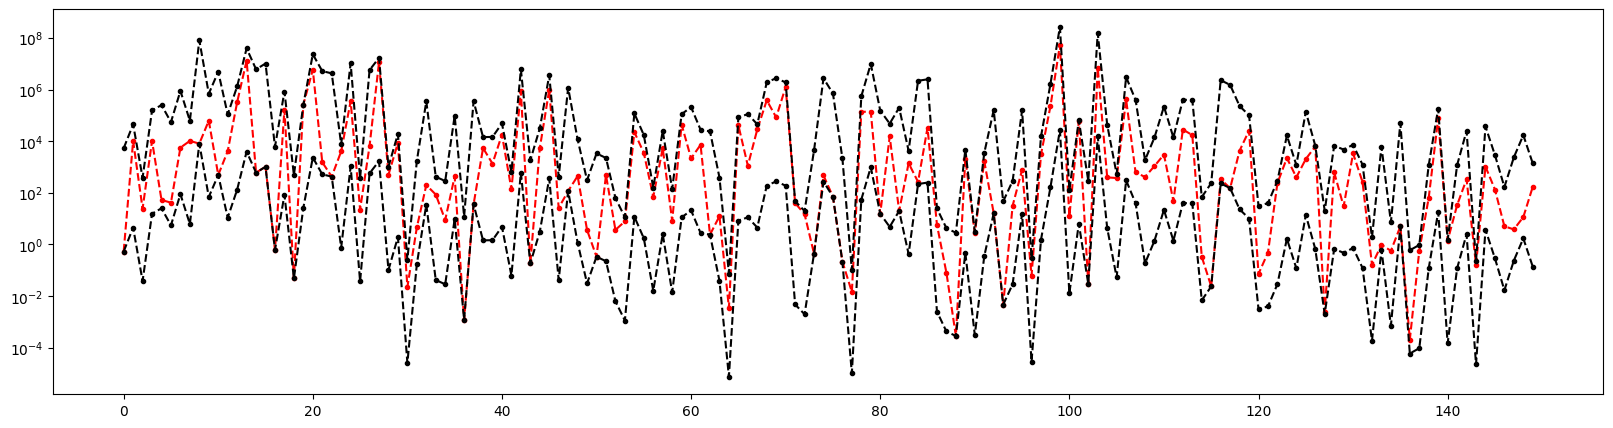

In [39]:
train_myprob.set_bounds(new_upper, new_lower)
with open('checkpoint_t_testw.dat', 'rb') as file:
    pops = pickle.load(file)

uc = train_myprob._unscale(pops[0].get_x()[100,:])

plt.figure(figsize=(20,5))
plt.plot(uc[:150],'r.--')
plt.plot(new_lower[:150],'k.--')
plt.plot(new_upper[:150],'k.--')
plt.yscale('log')

In [9]:
from src.fitting.pygmo_problems import SBMLGlobalFit_Multi_Fly
train_myprob,test_myprob = [SBMLGlobalFit_Multi_Fly(
    model = t['models'], 
    data = t['data'], 
    parameter_labels=parameter_labels, 
    lower_bounds=lower, upper_bounds=upper, 
    metadata=t['metadata'],
    variables=t['variables'],
    scale=True,
    dlambda = 1) for t in [train, test]]

# with open('train_myprob.obj', 'wb') as file:
#     pickle.dump(train_myprob, file)

train_prob = pg.problem(train_myprob)
test_prob = pg.problem(test_myprob)

In [36]:
udbfe._view.push({'prob_train': train_prob,'prob_test': test_prob}, block = True)
udbfe._view.apply_sync(lambda x: x.extract(SBMLGlobalFit_Multi_Fly)._setup_rr(), ipp.Reference('prob_train'))
udbfe._view.apply_sync(lambda x: x.extract(SBMLGlobalFit_Multi_Fly)._setup_rr(), ipp.Reference('prob_test'))
mybfe = pg.bfe(udbfe)

In [10]:
import ipyparallel as ipp
from src.fitting.pygmo_bfes import pickleless_bfe

client = ipp.Client(profile='cheme-ecfers')
client[:].apply_sync(os.chdir,'/mmfs1/gscratch/cheme/dalba/repos/ECFERS');

def set_affinity_on_worker():
    """When a new worker process is created, the affinity is set to all CPUs"""
    import os
    os.system("taskset -p 0xffffffffff %d" % os.getpid())

client[:].apply_sync(set_affinity_on_worker)

udbfe = pickleless_bfe(client_kwargs={'profile':'cheme-ecfers'}, view_kwargs = {}, temp_dv_path = os.getcwd()+'/models/binaries2', prob = {'train':train_prob, 'test':test_prob})
udbfe.init_view(client_kwargs={'profile':'cheme-ecfers'},view_kwargs = {})
mybfe = pg.bfe(udbfe)

In [11]:
# pick parameters based on this thesis
# https://repository.up.ac.za/handle/2263/66233#:~:text=The%20thesis%20shows%20that%20the,empirical%20tests%20and%20theoretical%20reasoning.
algos = []
pops = []
replicates = 1
for i in range(replicates):
    a = pg.pso_gen(gen=10,omega=0.7298, eta1=2.05, eta2=2.05, max_vel=0.5, variant=5, neighb_type=2, neighb_param=6, memory=True)
    # a = pg.gaco(gen=10)
    a.set_bfe(mybfe)
    algo = pg.algorithm(a)
    algo.set_verbosity(1)
    algos.append(algo)
    pops.append(pg.population(train_prob, size = 0))

In [12]:
total_nodes = len(client[:])*1
for p in pops:
    xs = np.apply_along_axis(train_myprob._scale, 0, np.array([(np.random.uniform(p/w,p*w, total_nodes)) for p,w in zip(p_initial,widths)])).T
    fs = udbfe(train_prob,xs.reshape(-1))
    list(map(p.push_back, xs, fs[:,np.newaxis]))

with open('checkpoint_local.dat', 'wb') as file:
    pickle.dump(pops, file)

In [43]:
import pickle

with open('logs_t_testw.dat', 'rb') as file:
    logs, test_fit = pickle.load(file)

with open('checkpoint_t_testw.dat', 'rb') as file:
    pops = pickle.load(file)

In [90]:
import pickle
now = lambda: datetime.fromtimestamp(datetime.now().timestamp()).strftime("%d-%m-%Y, %H:%M:%S")
# logs = [[] for _ in range(replicates)]
# test_fit = []
for i in range(200):
    print(now() + ' - Starting evolution ' + str(i))
    pops = [a.evolve(p) for a,p in zip(algos,pops)]

    print(now() + ' - Evolution done. Best fitness: ' + str(np.min([p.champion_f for p in pops])))
    
    test_fit.append([[udbfe(test_prob,p.get_x().reshape(-1), mode = 'test')] for p in pops])

    print(now() + ' - Test done. Best fitness: ' + str(np.min([p[0] for p in test_fit[-1]])))
    print(now() + ' - Test fitness of champion: ' + str(np.min([t[0][np.argsort(p.get_f()[:,0])[0]] for p,t in zip(pops,test_fit[-1])])))
    

    for i,a in enumerate(algos):
        logs[i].append(np.array(a.extract(pg.pso_gen).get_log()))

    with open('logs_t_testw.dat', 'wb') as file:
        pickle.dump([logs,test_fit], file)

    with open('checkpoint_t_testw.dat', 'wb') as file:
        pickle.dump(pops, file)
    
    # # replace the worst 10% of the population with new random individuals, from same distribution as the initial population
    # for p in pops:
    #     replace = int(len(p)/10)
    #     xs = np.apply_along_axis(train_myprob._scale, 0, np.array([(np.random.uniform(p/w,p*w, replace)) for p,w in zip(p_initial,widths)])).T
    #     fs = udbfe(train_prob,xs.reshape(-1))
    #     list(map(p.set_xf, np.argsort(p.get_f()[:,0])[-replace:], xs, fs[:,np.newaxis]))
    
    # udbfe._view.client.purge_everything()

    # if np.min([p.champion_f for p in pops]) < prob.extract(SBMLGlobalFit)._residual(result[:,1:].__array__()*(1.055),result[:,1:].__array__()):
    #     break
    

08-07-2024, 10:35:14 - Starting evolution 0


[3.34193744750452,
 3.2717010074068407,
 3.2655226123973846,
 3.2467923940172807,
 3.2105099039085627,
 3.1932123960503387,
 3.180075757891312,
 3.1537714349538524,
 3.1498559909179606,
 3.143206913975437,
 3.1308683605880083,
 3.1212542652622144,
 3.1204740975528567,
 3.1060557262629414,
 3.0996001630937116,
 3.09076793590294,
 3.0864157924381264,
 3.086126277348113,
 3.078783665833871,
 3.074223253100726,
 3.0668156845662415,
 3.0533268378377367,
 3.048457122544431,
 3.0448105814003905,
 3.0429899834082046,
 3.04370952322938,
 3.035900158998505,
 3.0308458712372026,
 3.0281947390407074,
 3.02773368300809,
 3.0215034705892965,
 3.017991090956727,
 3.014917689746981,
 3.0121875241341844,
 3.0098778514550912,
 3.007911971383033,
 3.0085973490063567,
 3.0052086207761968,
 3.0024068942795483,
 3.0026846727881766,
 3.0010905825885876,
 3.0011204871788864,
 2.9985861481862255,
 2.9998453965815415,
 2.997385836726554,
 2.995704983572452,
 2.996363866713966,
 2.9973145380248796,
 2.9933408384

Text(0.5, 1.0, 'Convergence for VNMetGly_BIOSYN')

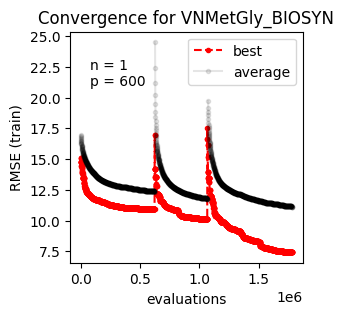

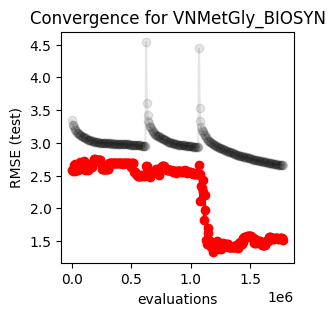

In [78]:
results = [np.concatenate(l,axis=0) for l in logs]
plt.figure(figsize=(3,3))
[plt.plot(np.arange(0,len(res[:,2])*600,600),res[:,2],'.r--', label = 'best') for res in results]
[plt.plot(np.arange(0,len(res[:,2])*600,600),res[:,4],'.k-', alpha = 0.1, label = 'average') for res in results]
# plt.xscale('log')

# plt.yscale('log')
plt.ylabel('RMSE (train)')
plt.xlabel('evaluations')
plt.title('Convergence for VNMetGly_BIOSYN')  
plt.legend()
plt.text(80000, 21, 'n = 1 \np = 600');

plt.figure(figsize=(3,3))
[plt.plot(np.arange(0,len(res[:,2])*600,600*10), [np.array(t)[np.isfinite(t)].mean() for t in test_fit],'ok-', label = 'average', alpha = 0.1) for res in results]
[plt.plot(np.arange(0,len(res[:,2])*600,600*10), np.squeeze(np.array(test_fit)).min(axis=1),'or-', label = 'best') for res in results]
plt.ylabel('RMSE (test)')
plt.xlabel('evaluations')
plt.title('Convergence for VNMetGly_BIOSYN')  


In [47]:
test_myprob._setup_rr()
train_myprob._setup_rr()

all_results = [[{s:[] for s in m['sample_labels']} for m in t.metadata] for t in [train_myprob, test_myprob]] 
for k,c in enumerate(pops[0].get_x()[np.argsort(pops[0].get_f()[:,0])[:6],:]):
    test_res = test_myprob._simulate(test_myprob._unscale(c))
    uc = train_myprob._unscale(c)
    train_res = train_myprob._simulate(uc)
    [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[0], train_res, train_myprob.metadata, train_myprob.model_stuff)]
    [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[1], test_res, test_myprob.metadata, test_myprob.model_stuff)]


In [66]:
test_myprob._setup_rr()
train_myprob._setup_rr()
all_results = [[{s:[] for s in m['sample_labels']} for m in t.metadata] for t in [train_myprob, test_myprob]] 
for k,c in enumerate(pops[0].get_x()[np.argsort(test_fit[-1][0][0])[:6],:]): # top 6 for test
    test_res = test_myprob._simulate(test_myprob._unscale(c))
    uc = train_myprob._unscale(c)
    train_res = train_myprob._simulate(uc)
    [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[0], train_res, train_myprob.metadata, train_myprob.model_stuff)]
    [[a[s].append(res_dict[s][:,ms.cols[s]][ms.rows[s],:]) for s in m['sample_labels']] for a, res_dict, m, ms in zip(all_results[1], test_res, test_myprob.metadata, test_myprob.model_stuff)]


/tmp/ipykernel_173/4089472006.py:15: UserWarning:

tight_layout not applied: number of columns in subplot specifications must be multiples of one another.

/tmp/ipykernel_173/4089472006.py:35: UserWarning:

tight_layout not applied: number of columns in subplot specifications must be multiples of one another.



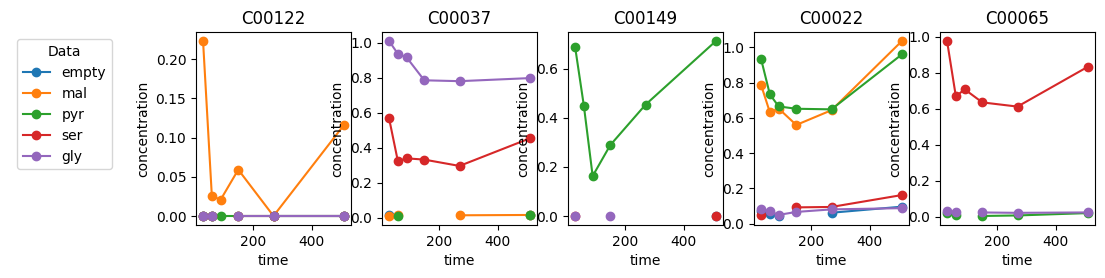

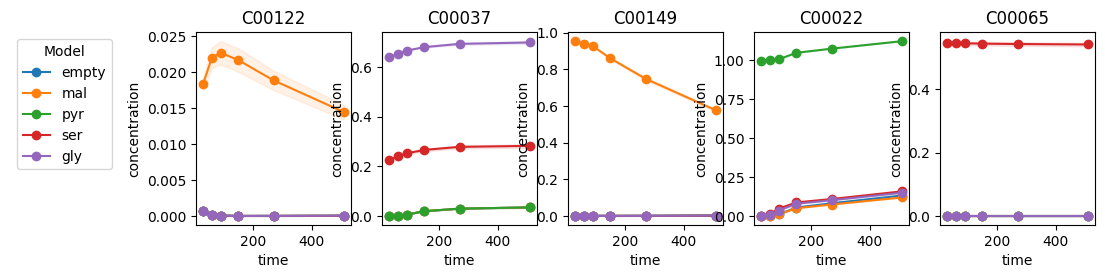

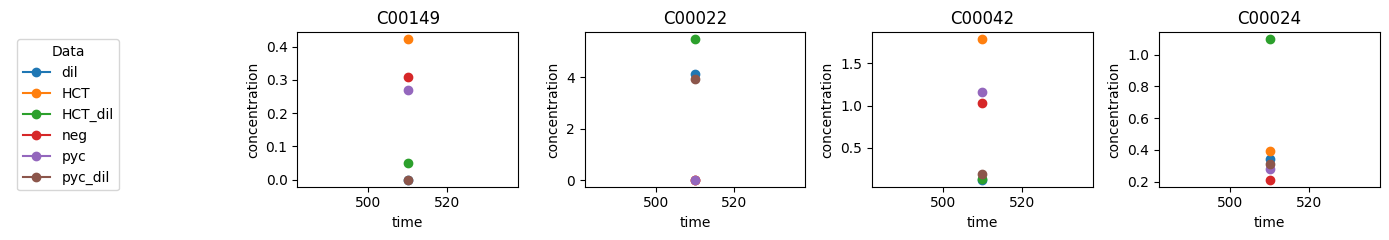

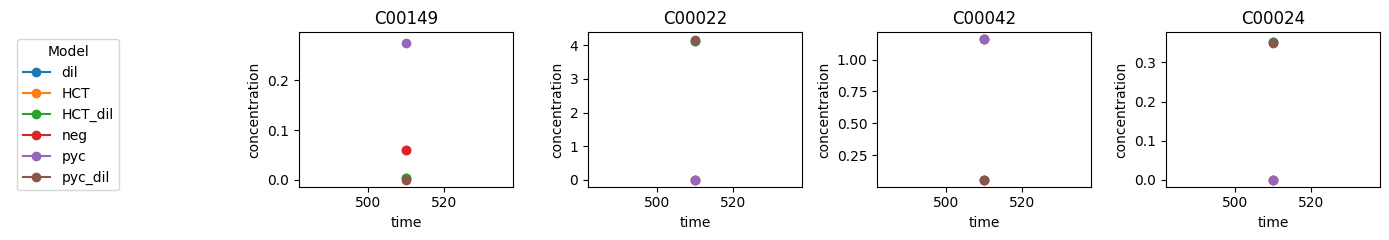

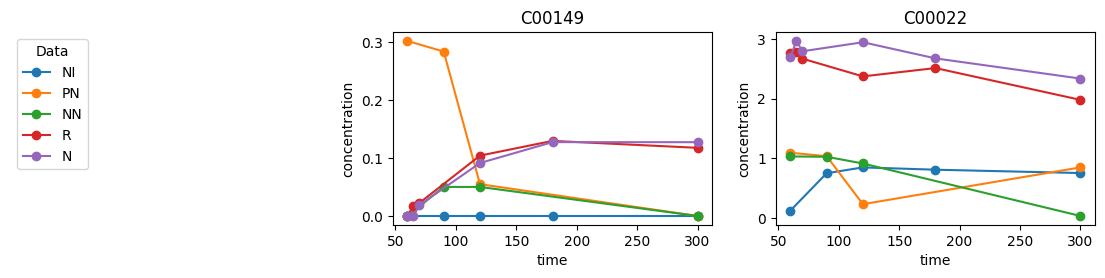

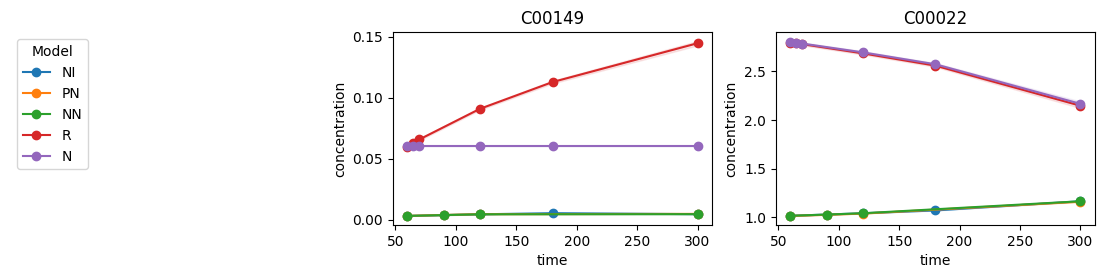

In [79]:
for metadata, measurements, results in zip(train_myprob.metadata, train_myprob.data, all_results[0]):    
    plt.figure(figsize=(14,2.5))
    for s in metadata['sample_labels']:
        for i,m in enumerate(metadata['measurement_labels']):
            plt.subplot(1,len(metadata['measurement_labels'])+1,i+2)
            plt.plot(metadata['timepoints'][s]/60, measurements[s][:,i],'-o')
            plt.title(m)
            plt.xlabel('time')
            plt.ylabel('concentration')

    plt.subplot(1,5,1)
    [plt.plot(metadata['timepoints'][s], measurements[s][:,i]/np.nan,'-o') for s in metadata['sample_labels']]
    plt.legend(metadata['sample_labels'], loc='upper left', title='Data')
    plt.gca().axis('off')
    plt.tight_layout()

    
    plt.figure(figsize=(14,2.5))
    for s in metadata['sample_labels']:
        for i,m in enumerate(metadata['measurement_labels']):
            plt.subplot(1,len(metadata['measurement_labels'])+1,i+2)
            if s in results.keys():
                mean = np.mean(results[s],0)[:,i]
                std = np.std(results[s],0)[:,i]
                p = plt.plot(metadata['timepoints'][s]/60, mean,'-o')
                plt.fill_between(metadata['timepoints'][s]/60, mean - std, mean + std, alpha=0.1, color = p[-1].get_color())
            plt.title(m)
            plt.xlabel('time')
            plt.ylabel('concentration')

    plt.subplot(1,5,1)
    [plt.plot(metadata['timepoints'][s], measurements[s][:,i]/np.nan,'-o') for s in metadata['sample_labels'] if s in results.keys()]
    plt.legend(results.keys(), loc='upper left', title='Model')
    plt.gca().axis('off')
    plt.tight_layout()
        

/tmp/ipykernel_173/1204986852.py:15: UserWarning:

tight_layout not applied: number of columns in subplot specifications must be multiples of one another.

/tmp/ipykernel_173/1204986852.py:35: UserWarning:

tight_layout not applied: number of columns in subplot specifications must be multiples of one another.



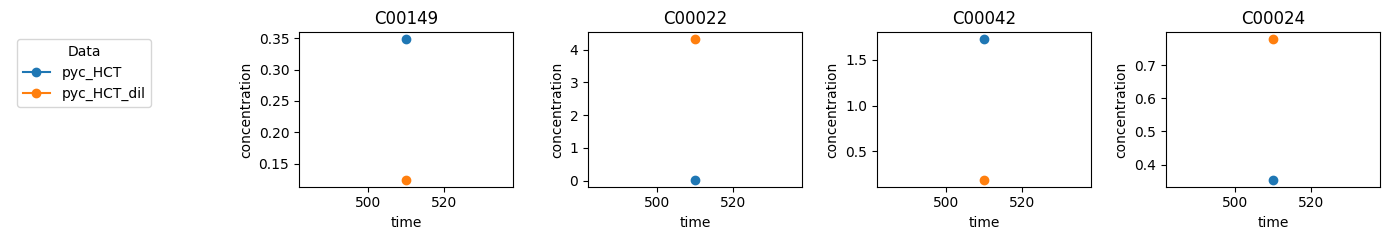

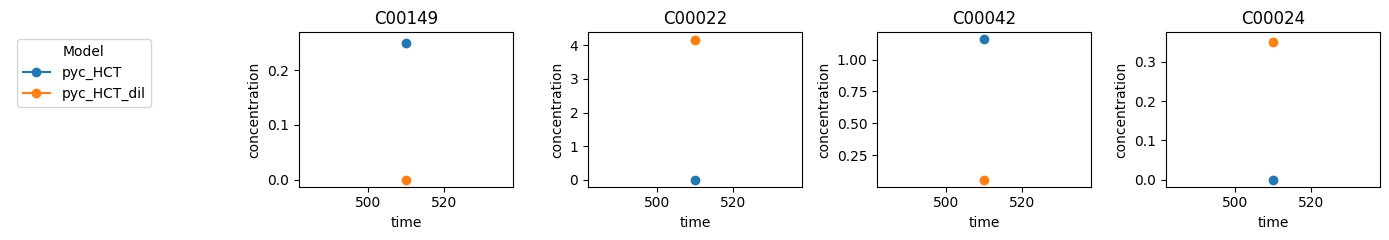

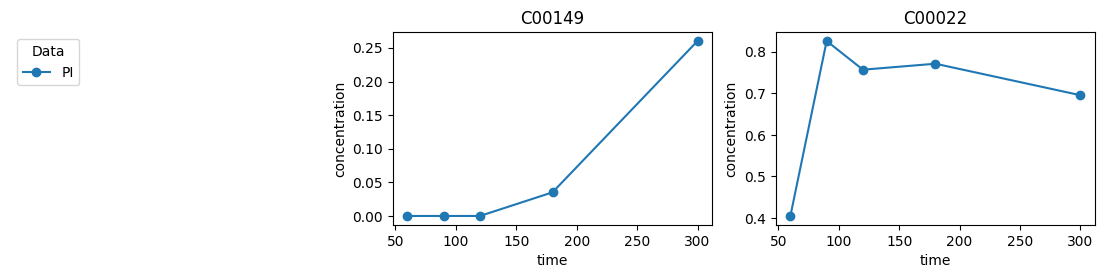

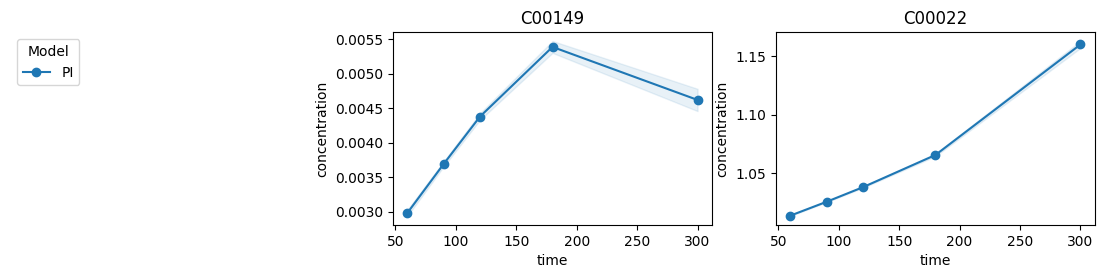

In [85]:
for metadata, measurements, results in zip(test_myprob.metadata, test_myprob.data, all_results[1]):    
    plt.figure(figsize=(14,2.5))
    for s in metadata['sample_labels']:
        for i,m in enumerate(metadata['measurement_labels']):
            plt.subplot(1,len(metadata['measurement_labels'])+1,i+2)
            plt.plot(metadata['timepoints'][s]/60, measurements[s][:,i],'-o')
            plt.title(m)
            plt.xlabel('time')
            plt.ylabel('concentration')

    plt.subplot(1,5,1)
    [plt.plot(metadata['timepoints'][s], measurements[s][:,i]/np.nan,'-o') for s in metadata['sample_labels']]
    plt.legend(metadata['sample_labels'], loc='upper left', title='Data')
    plt.gca().axis('off')
    plt.tight_layout()

    
    plt.figure(figsize=(14,2.5))
    for s in metadata['sample_labels']:
        for i,m in enumerate(metadata['measurement_labels']):
            plt.subplot(1,len(metadata['measurement_labels'])+1,i+2)
            if s in results.keys():
                mean = np.mean(results[s],0)[:,i]
                std = np.std(results[s],0)[:,i]
                p = plt.plot(metadata['timepoints'][s]/60, mean,'-o')
                plt.fill_between(metadata['timepoints'][s]/60, mean - std, mean + std, alpha=0.1, color = p[-1].get_color())
            plt.title(m)
            plt.xlabel('time')
            plt.ylabel('concentration')

    plt.subplot(1,5,1)
    [plt.plot(metadata['timepoints'][s], measurements[s][:,i]/np.nan,'-o') for s in metadata['sample_labels'] if s in results.keys()]
    plt.legend(results.keys(), loc='upper left', title='Model')
    plt.gca().axis('off')
    plt.tight_layout()
        

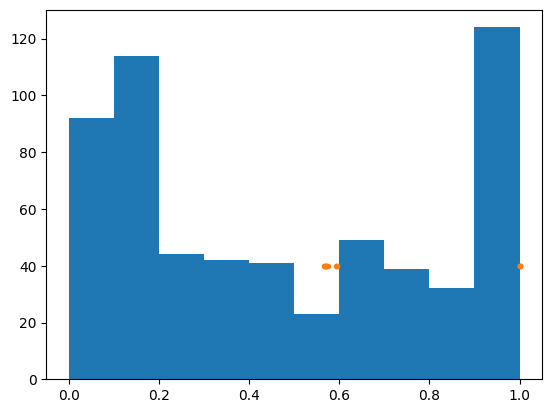

In [87]:
p = -1
N = 15
plt.hist(pops[0].get_x()[:,p])
# plt.hist(xs[:,p], alpha = 0.5)
plt.plot(pops[0].get_x()[np.argsort(pops[0].get_f()[:,0])[:N],:][:,p], [40]*N,'.')

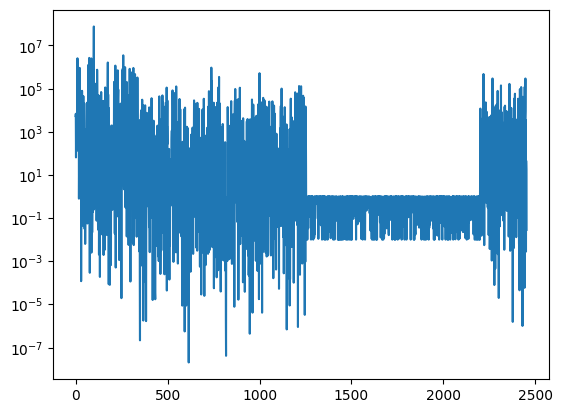

In [88]:
plt.plot(uc)
plt.yscale('log')

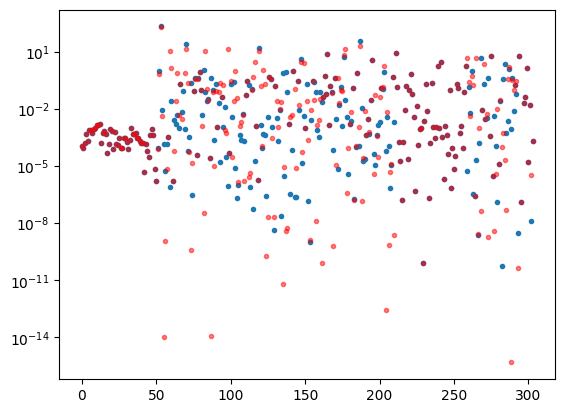

In [89]:
plt.plot(train_res[0]['ser'][0,:],'.')
plt.plot(train_res[0]['ser'][-1,:],'.r', alpha =0.5)

plt.yscale('log')

In [9]:
top_pop = pg.population(pg.problem(myprob), size = 0)
list(map(top_pop.push_back, pops[0].get_x()[np.argsort(pops[0].get_f()[:,0])[:600],:],pops[0].get_f()[np.argsort(pops[0].get_f()[:,0])[:600],:]));

In [10]:
top_pop = pops[0].get_x()[np.argsort(pops[0].get_f()[:,0])[:600],:]

In [27]:
def multi_minimize(pop, prob, rank):
    from scipy.optimize import minimize, Bounds 
    bounds = Bounds(prob.get_bounds()[0],prob.get_bounds()[1],True)
    # options = {'maxfev':2500,'adaptive':True}
    options = {'disp':0, 'maxiter':1}
    results = minimize(prob.fitness, pop[rank,:], method='L-BFGS-B', bounds = bounds, options = options)
    return results

In [28]:
udbfe._view.push({"multi_minimize": multi_minimize,"pop":pops[0].get_x()}, block = True);

In [29]:
local_fits = udbfe._view.apply_sync(lambda x,y,z: multi_minimize(x,y,z), ipp.Reference("pop"), ipp.Reference("prob_train"), ipp.Reference("rank"))

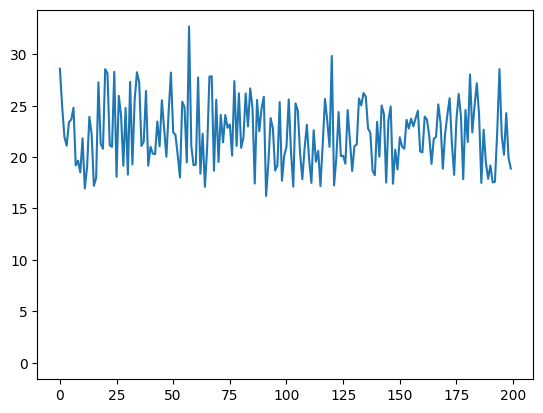

In [25]:
plt.plot(pops[0].get_f().T-np.array([fit.fun for fit in local_fits]))
plt.plot(pops[0].get_f())

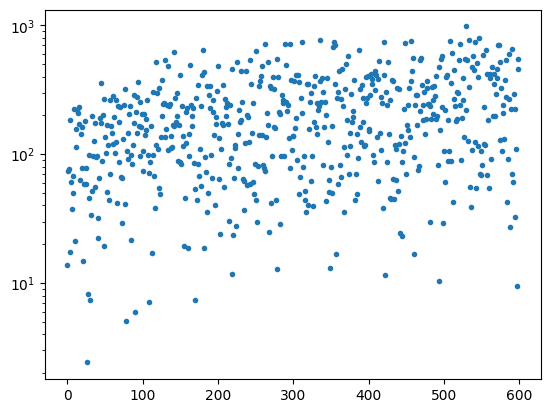

In [46]:
plt.plot(np.squeeze(pops[0].get_f()[np.argsort(pops[0].get_f()[:,0])[:600],:]) - [fit.fun for fit in local_fits],'.')
plt.yscale('log')

In [38]:
print(np.arange(15))
print(np.argsort([fit.fun for fit in local_fits])[:15])


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 4  9  0  1  2 16 13 14  5  3 45  7 12  6 15]


In [40]:
np.argsort([fit.fun for fit in local_fits])[:15]
local_fits[0].x

array([0.00115716, 0.0521422 , 0.06525401, ..., 0.16534265, 0.24093261,
       0.12788583])

In [42]:
myprob._setup_rr()
all_results_local = {s:[] for s in metadata['sample_labels']}
for k,c in enumerate(np.argsort([fit.fun for fit in local_fits])[:15]):
    res_dict = myprob._simulate(myprob._unscale(local_fits[c].x))
    [all_results_local[s].append(res_dict[s][:,myprob.cols[s]][myprob.rows[s],:]) for s in metadata['sample_labels']]

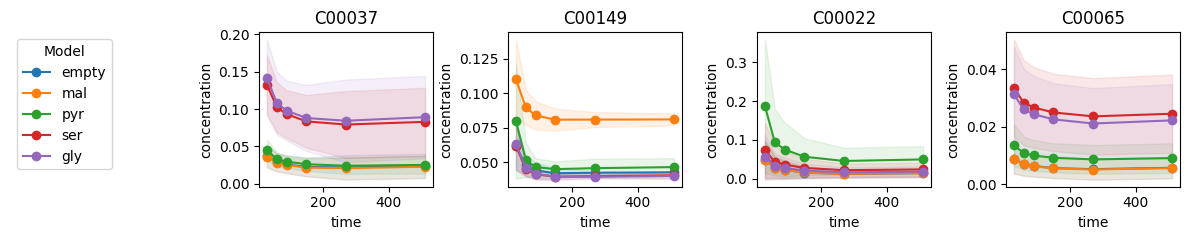

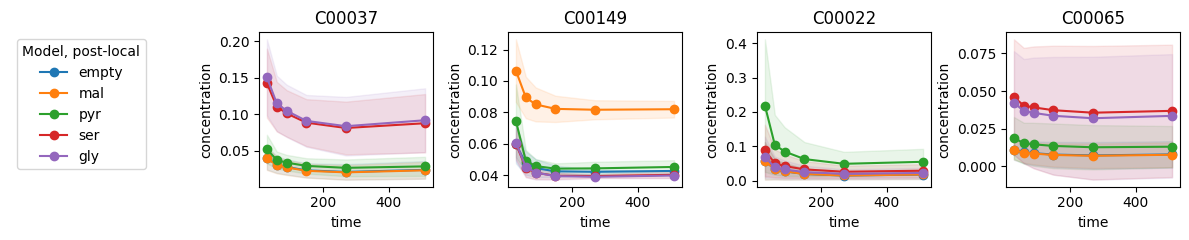

In [47]:
plt.figure(figsize=(12,2.5))
for s in metadata['sample_labels']:
    for i,m in enumerate(metadata['measurement_labels']):
        plt.subplot(1,5,i+2)
        mean = np.mean(all_results[s],0)[:,i]
        std = np.std(all_results[s],0)[:,i]
        p = plt.plot(metadata['timepoints'][s]/60, mean,'-o')
        plt.fill_between(metadata['timepoints'][s]/60, mean - std, mean + std, alpha=0.1, color = p[-1].get_color())
        plt.title(m)
        plt.xlabel('time')
        plt.ylabel('concentration')

plt.subplot(1,5,1)
[plt.plot(metadata['timepoints'][s], measurements[s][:,i]/np.nan,'-o') for s in metadata['sample_labels']]
plt.legend(metadata['sample_labels'], loc='upper left', title='Model')
plt.gca().axis('off')
plt.tight_layout()

plt.figure(figsize=(12,2.5))
for s in metadata['sample_labels']:
    for i,m in enumerate(metadata['measurement_labels']):
        plt.subplot(1,5,i+2)
        mean = np.mean(all_results_local[s],0)[:,i]
        std = np.std(all_results_local[s],0)[:,i]
        p = plt.plot(metadata['timepoints'][s]/60, mean,'-o')
        plt.fill_between(metadata['timepoints'][s]/60, mean - std, mean + std, alpha=0.1, color = p[-1].get_color())
        plt.title(m)
        plt.xlabel('time')
        plt.ylabel('concentration')

plt.subplot(1,5,1)
[plt.plot(metadata['timepoints'][s], measurements[s][:,i]/np.nan,'-o') for s in metadata['sample_labels']]
plt.legend(metadata['sample_labels'], loc='upper left', title='Model, post-local')
plt.gca().axis('off')
plt.tight_layout()

In [32]:
top = pops[0].get_x()[np.argsort(pops[0].get_f()[:,0])[:15],:]
mean = np.array(top.mean(axis=0))
std = np.array(top.std(axis=0))

std[(mean<0.8)*(mean>0.1)] = np.nan
plot_labels = np.array(parameter_labels)
plot_labels[(mean<0.8)*(mean>0.1)] = ''
inital = test_myprob._scale(new_p_initial)
inital[(mean<0.8)*(mean>0.1)] = np.nan
mean[(mean<0.8)*(mean>0.1)] = np.nan


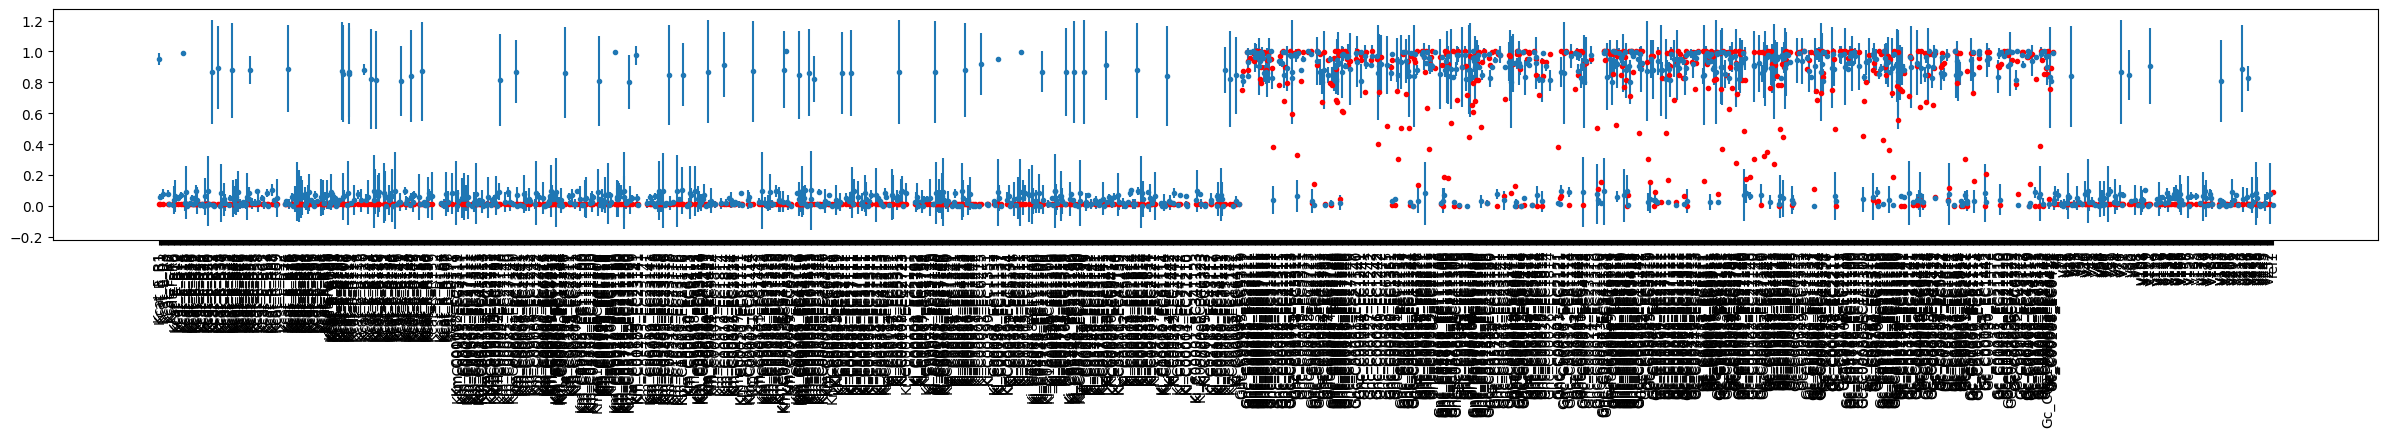

In [33]:
plt.figure(figsize=(30,3))
plt.errorbar(range(len(top[0,:])),mean,yerr=std, fmt='.')
plt.plot(range(len(top[0,:])),inital,'r.')
plt.xticks(range(len(plot_labels)),plot_labels, rotation = 90);